In [9]:
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 25s 6us/step


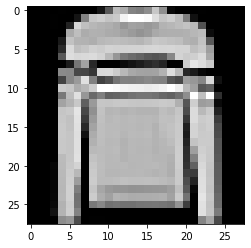

In [4]:
plt.imshow(x_train[5],cmap='gray')
plt.show()

In [5]:
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Activation

In [7]:
%qtconsole

In [15]:
x_train = np.reshape(x_train,(x_train.shape + (1,)))
x_test = np.reshape(x_test,(x_test.shape + (1,)))

In [33]:
def build_model(hp):

    model = keras.models.Sequential()

    model.add(Conv2D(hp.Int("input_units", min_value=32, max_value=256, step=32), (3, 3), input_shape=x_train.shape[1:]))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    for i in range(hp.Int('n_layers', 1, 4)):  # adding variation of layers.
        model.add(Conv2D(hp.Int(f'conv_{i}_units',
                                min_value=32,
                                max_value=256,
                                step=32), (3, 3)))
        model.add(Activation('relu'))

    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

    model.add(Dense(10))
    model.add(Activation("softmax"))

    model.compile(optimizer="adam",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    
    return model

In [24]:
model.fit(x_train, y_train, batch_size=64, epochs=1, validation_data = (x_test, y_test))

Train on 60000 samples, validate on 10000 samples
60000/60000 [==============================] - 108s 2ms/sample - loss: 0.4419 - accuracy: 0.8432 - val_loss: 0.4266 - val_accuracy: 0.8415


In [26]:
from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters
import time

In [35]:
LOG_DIR = f"{int(time.time())}"

tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=1,  # how many model variations to test?
    executions_per_trial=1,  # how many trials per variation? (same model could perform differently)
    directory=LOG_DIR)

In [36]:
tuner.search(x=x_train,
             y=y_train,
             verbose=1, # just slapping this here bc jupyter notebook. The console out was getting messy.
             epochs=1,
             batch_size=64,
             #callbacks=[tensorboard],  # if you have callbacks like tensorboard, they go here.
             validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples


11776/60000 [====>.........................] - ETA: 21:15 - loss: 11.0845 - accuracy: 0.15 - ETA: 13:47 - loss: 10.6916 - accuracy: 0.13 - ETA: 11:07 - loss: 9.5756 - accuracy: 0.1146 - ETA: 9:32 - loss: 8.4050 - accuracy: 0.109 - ETA: 8:49 - loss: 7.9091 - accuracy: 0.11 - ETA: 8:18 - loss: 7.2218 - accuracy: 0.13 - ETA: 8:03 - loss: 6.5894 - accuracy: 0.12 - ETA: 7:48 - loss: 6.1735 - accuracy: 0.12 - ETA: 7:30 - loss: 5.7316 - accuracy: 0.12 - ETA: 7:17 - loss: 5.3493 - accuracy: 0.13 - ETA: 7:08 - loss: 5.0742 - accuracy: 0.13 - ETA: 7:01 - loss: 4.8438 - accuracy: 0.14 - ETA: 6:53 - loss: 4.6306 - accuracy: 0.15 - ETA: 6:47 - loss: 4.4337 - accuracy: 0.16 - ETA: 6:43 - loss: 4.2456 - accuracy: 0.18 - ETA: 6:36 - loss: 4.0907 - accuracy: 0.20 - ETA: 6:35 - loss: 3.9706 - accuracy: 0.20 - ETA: 6:33 - loss: 3.8482 - accuracy: 0.21 - ETA: 6:29 - loss: 3.7286 - accuracy: 0.23 - ETA: 6:26 - loss: 3.6211 - accuracy: 0.24 - ETA: 6:22 - loss: 3.5182 - accuracy: 0.25 - ETA: 6:20 - loss: 3.4

23680/60000 [==========>...................] - ETA: 7:57 - loss: 1.1147 - accuracy: 0.66 - ETA: 7:57 - loss: 1.1113 - accuracy: 0.66 - ETA: 7:56 - loss: 1.1093 - accuracy: 0.66 - ETA: 7:56 - loss: 1.1079 - accuracy: 0.66 - ETA: 7:56 - loss: 1.1052 - accuracy: 0.66 - ETA: 7:56 - loss: 1.1032 - accuracy: 0.66 - ETA: 7:56 - loss: 1.0999 - accuracy: 0.66 - ETA: 7:56 - loss: 1.0967 - accuracy: 0.66 - ETA: 7:55 - loss: 1.0944 - accuracy: 0.66 - ETA: 7:54 - loss: 1.0910 - accuracy: 0.66 - ETA: 7:55 - loss: 1.0890 - accuracy: 0.66 - ETA: 7:54 - loss: 1.0870 - accuracy: 0.66 - ETA: 7:54 - loss: 1.0843 - accuracy: 0.66 - ETA: 7:54 - loss: 1.0825 - accuracy: 0.66 - ETA: 7:54 - loss: 1.0803 - accuracy: 0.66 - ETA: 7:53 - loss: 1.0780 - accuracy: 0.66 - ETA: 7:53 - loss: 1.0760 - accuracy: 0.66 - ETA: 7:53 - loss: 1.0738 - accuracy: 0.66 - ETA: 7:52 - loss: 1.0717 - accuracy: 0.67 - ETA: 7:52 - loss: 1.0698 - accuracy: 0.67 - ETA: 7:52 - loss: 1.0684 - accuracy: 0.67 - ETA: 7:52 - loss: 1.0661 - ac

35584/60000 [================>.............] - ETA: 6:26 - loss: 0.8479 - accuracy: 0.72 - ETA: 6:25 - loss: 0.8469 - accuracy: 0.72 - ETA: 6:24 - loss: 0.8461 - accuracy: 0.72 - ETA: 6:23 - loss: 0.8449 - accuracy: 0.72 - ETA: 6:22 - loss: 0.8439 - accuracy: 0.72 - ETA: 6:22 - loss: 0.8429 - accuracy: 0.72 - ETA: 6:21 - loss: 0.8421 - accuracy: 0.72 - ETA: 6:20 - loss: 0.8413 - accuracy: 0.72 - ETA: 6:20 - loss: 0.8403 - accuracy: 0.72 - ETA: 6:19 - loss: 0.8394 - accuracy: 0.72 - ETA: 6:18 - loss: 0.8391 - accuracy: 0.72 - ETA: 6:16 - loss: 0.8389 - accuracy: 0.72 - ETA: 6:15 - loss: 0.8379 - accuracy: 0.72 - ETA: 6:14 - loss: 0.8365 - accuracy: 0.72 - ETA: 6:13 - loss: 0.8358 - accuracy: 0.72 - ETA: 6:12 - loss: 0.8351 - accuracy: 0.72 - ETA: 6:11 - loss: 0.8341 - accuracy: 0.72 - ETA: 6:10 - loss: 0.8333 - accuracy: 0.72 - ETA: 6:09 - loss: 0.8323 - accuracy: 0.72 - ETA: 6:08 - loss: 0.8316 - accuracy: 0.72 - ETA: 6:07 - loss: 0.8310 - accuracy: 0.72 - ETA: 6:06 - loss: 0.8300 - ac

47488/60000 [======================>.......] - ETA: 3:50 - loss: 0.7371 - accuracy: 0.75 - ETA: 3:49 - loss: 0.7366 - accuracy: 0.75 - ETA: 3:49 - loss: 0.7363 - accuracy: 0.75 - ETA: 3:48 - loss: 0.7358 - accuracy: 0.75 - ETA: 3:47 - loss: 0.7352 - accuracy: 0.75 - ETA: 3:46 - loss: 0.7346 - accuracy: 0.75 - ETA: 3:46 - loss: 0.7346 - accuracy: 0.75 - ETA: 3:45 - loss: 0.7340 - accuracy: 0.75 - ETA: 3:44 - loss: 0.7334 - accuracy: 0.75 - ETA: 3:43 - loss: 0.7328 - accuracy: 0.75 - ETA: 3:43 - loss: 0.7323 - accuracy: 0.75 - ETA: 3:42 - loss: 0.7317 - accuracy: 0.75 - ETA: 3:41 - loss: 0.7311 - accuracy: 0.75 - ETA: 3:40 - loss: 0.7305 - accuracy: 0.75 - ETA: 3:40 - loss: 0.7297 - accuracy: 0.75 - ETA: 3:39 - loss: 0.7293 - accuracy: 0.75 - ETA: 3:38 - loss: 0.7286 - accuracy: 0.75 - ETA: 3:38 - loss: 0.7283 - accuracy: 0.75 - ETA: 3:37 - loss: 0.7279 - accuracy: 0.75 - ETA: 3:36 - loss: 0.7274 - accuracy: 0.75 - ETA: 3:35 - loss: 0.7267 - accuracy: 0.75 - ETA: 3:35 - loss: 0.7259 - ac

59392/60000 [============================>.] - ETA: 1:54 - loss: 0.6683 - accuracy: 0.77 - ETA: 1:53 - loss: 0.6680 - accuracy: 0.77 - ETA: 1:53 - loss: 0.6678 - accuracy: 0.77 - ETA: 1:52 - loss: 0.6677 - accuracy: 0.77 - ETA: 1:52 - loss: 0.6673 - accuracy: 0.77 - ETA: 1:51 - loss: 0.6670 - accuracy: 0.77 - ETA: 1:50 - loss: 0.6666 - accuracy: 0.77 - ETA: 1:50 - loss: 0.6663 - accuracy: 0.77 - ETA: 1:49 - loss: 0.6662 - accuracy: 0.77 - ETA: 1:49 - loss: 0.6659 - accuracy: 0.77 - ETA: 1:48 - loss: 0.6657 - accuracy: 0.77 - ETA: 1:47 - loss: 0.6652 - accuracy: 0.77 - ETA: 1:47 - loss: 0.6649 - accuracy: 0.77 - ETA: 1:46 - loss: 0.6644 - accuracy: 0.77 - ETA: 1:46 - loss: 0.6640 - accuracy: 0.77 - ETA: 1:45 - loss: 0.6637 - accuracy: 0.77 - ETA: 1:44 - loss: 0.6634 - accuracy: 0.77 - ETA: 1:44 - loss: 0.6631 - accuracy: 0.77 - ETA: 1:43 - loss: 0.6628 - accuracy: 0.77 - ETA: 1:43 - loss: 0.6625 - accuracy: 0.77 - ETA: 1:42 - loss: 0.6621 - accuracy: 0.77 - ETA: 1:41 - loss: 0.6618 - ac

60000/60000 [==============================] - ETA: 5s - loss: 0.6226 - accuracy: 0.78 - ETA: 4s - loss: 0.6225 - accuracy: 0.78 - ETA: 3s - loss: 0.6223 - accuracy: 0.78 - ETA: 3s - loss: 0.6218 - accuracy: 0.78 - ETA: 2s - loss: 0.6217 - accuracy: 0.78 - ETA: 2s - loss: 0.6216 - accuracy: 0.78 - ETA: 1s - loss: 0.6215 - accuracy: 0.78 - ETA: 0s - loss: 0.6213 - accuracy: 0.78 - ETA: 0s - loss: 0.6210 - accuracy: 0.78 - 581s 10ms/sample - loss: 0.6207 - accuracy: 0.7883 - val_loss: 0.4505 - val_accuracy: 0.8396


INFO:tensorflow:Oracle triggered exit
